# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

1. The findings of these analysis showed that there is a higher temperature for cities that found near to the equator (Latitude 0), however, when we go farther from the equator towards the north the temperature decreases highly. However, when we go to the south the temperature decreases but it is much lower comparing to the north. The regression analysis and plot also showed that there is a strong negative correlation between temperature, and latitude in the northern hemisphere however, the correlation between temperature and latitude in the south Hemisphere is negative but very week to conclude.
2. The findings from the data, plots, and the regression line in the case of testing if there is a relation between humidity and cloudiness of cities nearer or farther to the equator (latitude 0) doesn't show any significant results. The correlation between humidity and latitude for both northern and southern hemisphere cities is very week, negative correlation, and the result for cloudiness and latitude also very week and negative. Therefore, We can infer that humidity can be fairly distributed in both northern and southern hemisphere cities regardless of their distance from the equator.
3. The finding from the analysis of the relationship between wind speed (mph), and latitude showed that the lower wind speed when the cities closer to the equater (latitude 0), and somehow the wind speed increase for the cities farther from the equater. The regression analysis also showed that there is a very week, posetive correlation between Wind Speed (mph (%) and Latitude in the Northern Hemisphere cities

In [23]:
!pip install citipy
!pip install datetime

     |████████████████████████████████| 60 kB 3.2 MB/s eta 0:00:011
     |████████████████████████████████| 204 kB 9.1 MB/s eta 0:00:01


In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [25]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [26]:
# Url and units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [27]:
# List for holding reponse information
lat = []
temp = []
temp_max = []
humidity = []
wind_speed = []
lon = []
date = []
country = []
cloudiness = []


# Loop through the list of cities and request for data on each
print("Beginning Data Retrieval")
print("--------------------------------------------")
count = 0
set = 1
for idx, city in enumerate(cities):
    count = count + 1
    # To avoid api call rate limits, get city weather data for 50 cities,
    # then sleep for 5 seconds, and then continue with next 50 cities and so on...
    if count == 51:
        count = 1
        set = set + 1
        time.sleep(5)
    print(f"Processing Record {count} of Set {set} | {city}")
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
        cloudiness.append(response['clouds']['all'])
    except KeyError:
        print("City not found. Skipping...")
        lat.append(np.nan)
        lon.append(np.nan)
        temp.append(np.nan)
        temp_max.append(np.nan)
        humidity.append(np.nan)
        wind_speed.append(np.nan)
        date.append(np.nan)
        country.append(np.nan)
        cloudiness.append(np.nan)
print("------------------------------------------------")
print("Data Retrieval Complete")
print("------------------------------------------------")

Beginning Data Retrieval
--------------------------------------------
Processing Record 1 of Set 1 | kaitangata
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | podor
Processing Record 5 of Set 1 | hobart
Processing Record 6 of Set 1 | hilo
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | asau
Processing Record 9 of Set 1 | severo-kurilsk
Processing Record 10 of Set 1 | henties bay
Processing Record 11 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | higuey
City not found. Skipping...
Processing Record 14 of Set 1 | haines junction
Processing Record 15 of Set 1 | tiksi
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | clyde river
Processing Record 18 of Set 1 | tuktoyaktuk
Processing Record 19 of Set 1 | kishi
Processing Record 20 of Set 1 | olmos
Processing Record 21 of Set 1 | busselton
Processing Record 22 of

Processing Record 36 of Set 4 | namatanai
Processing Record 37 of Set 4 | saint george
Processing Record 38 of Set 4 | guymon
Processing Record 39 of Set 4 | verkhoyansk
Processing Record 40 of Set 4 | rocha
Processing Record 41 of Set 4 | avdiyivka
Processing Record 42 of Set 4 | isabela
Processing Record 43 of Set 4 | baswa
Processing Record 44 of Set 4 | hualmay
Processing Record 45 of Set 4 | sarahan
Processing Record 46 of Set 4 | san francisco
Processing Record 47 of Set 4 | hambantota
Processing Record 48 of Set 4 | rylsk
Processing Record 49 of Set 4 | astana
Processing Record 50 of Set 4 | skjervoy
Processing Record 1 of Set 5 | gimli
Processing Record 2 of Set 5 | rungata
City not found. Skipping...
Processing Record 3 of Set 5 | provideniya
Processing Record 4 of Set 5 | viransehir
Processing Record 5 of Set 5 | shingu
Processing Record 6 of Set 5 | roma
Processing Record 7 of Set 5 | coahuayana
Processing Record 8 of Set 5 | north bend
Processing Record 9 of Set 5 | nawalap

Processing Record 27 of Set 8 | hefei
Processing Record 28 of Set 8 | riberalta
Processing Record 29 of Set 8 | kamaishi
Processing Record 30 of Set 8 | carpinteria
Processing Record 31 of Set 8 | cortez
Processing Record 32 of Set 8 | yulara
Processing Record 33 of Set 8 | chadan
Processing Record 34 of Set 8 | worthing
Processing Record 35 of Set 8 | along
Processing Record 36 of Set 8 | kudal
Processing Record 37 of Set 8 | bonavista
Processing Record 38 of Set 8 | lamas
Processing Record 39 of Set 8 | vardo
Processing Record 40 of Set 8 | concepcion del oro
Processing Record 41 of Set 8 | mount gambier
Processing Record 42 of Set 8 | san juan
Processing Record 43 of Set 8 | doctor juan manuel frutos
Processing Record 44 of Set 8 | hofn
Processing Record 45 of Set 8 | dudinka
Processing Record 46 of Set 8 | murray bridge
Processing Record 47 of Set 8 | neryungri
Processing Record 48 of Set 8 | vilyuysk
Processing Record 49 of Set 8 | walvis bay
Processing Record 50 of Set 8 | bacung

Processing Record 19 of Set 12 | lavrentiya
Processing Record 20 of Set 12 | andujar
Processing Record 21 of Set 12 | yian
City not found. Skipping...
Processing Record 22 of Set 12 | sorland
Processing Record 23 of Set 12 | nouadhibou
Processing Record 24 of Set 12 | mount isa
Processing Record 25 of Set 12 | conakry
Processing Record 26 of Set 12 | cooma
Processing Record 27 of Set 12 | boa vista
Processing Record 28 of Set 12 | winfield
Processing Record 29 of Set 12 | pangai
Processing Record 30 of Set 12 | pemangkat
Processing Record 31 of Set 12 | tocopilla
Processing Record 32 of Set 12 | lakatoro
Processing Record 33 of Set 12 | chaozhou
Processing Record 34 of Set 12 | ribeira brava
Processing Record 35 of Set 12 | vila franca do campo
Processing Record 36 of Set 12 | port blair
Processing Record 37 of Set 12 | shimoda
Processing Record 38 of Set 12 | auki
Processing Record 39 of Set 12 | wakkanai
Processing Record 40 of Set 12 | ambunti
Processing Record 41 of Set 12 | colleg

In [28]:
# Length of Latitude and Temprature

len(lat)
len(temp)

606

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [29]:
# Convert raw data to dataframe.
city_weather_df = pd.DataFrame({
    "City": cities,
    "Lat": lat,
    "lng": lon,
    "Max Temp": temp_max,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date,
})

# Drop any cities that were skipped because they could not be found using the OpenWeatherMap API.
city_weather_df = city_weather_df.dropna(how="any")
print(city_weather_df.count())

City          559
Lat           559
lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64


In [30]:
# Export the city data into a .csv file.
city_weather_df.to_csv("../output_data/city_weather_data.csv", index=False)

# Display the DataFrame
weather_df = pd.read_csv("../output_data/city_weather_data.csv")

weather_df.head()

,City,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kaitangata,-46.2817,169.8464,57.99,65.0,3.0,8.01,NZ,1.613080e+09
1,albany,42.6001,-73.9662,27.00,41.0,63.0,5.01,US,1.613080e+09
2,rikitea,-23.1203,-134.9692,79.09,71.0,82.0,8.52,PF,1.613080e+09
3,podor,16.6527,-14.9587,82.40,28.0,0.0,2.30,MR,1.613081e+09
4,hobart,-42.8794,147.3294,64.99,48.0,20.0,17.27,AU,1.613081e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
This section is skiped because no cities that have humidity > 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

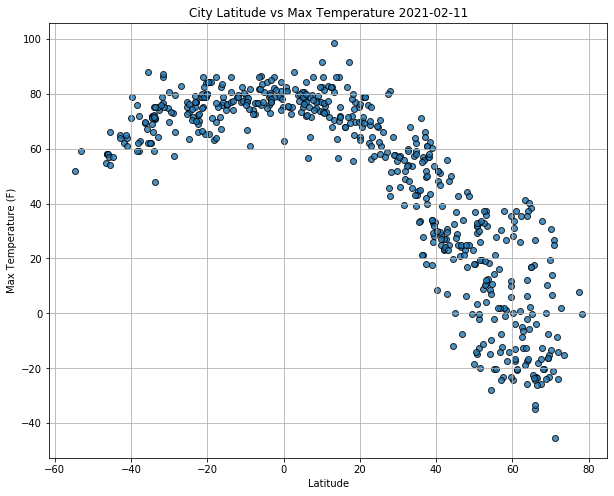

In [33]:
date_time = datetime.date(datetime.now())
# Create a scatter plot for latitude vs max temperature.
x_values = weather_df['Lat']
y_values = weather_df['Max Temp']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f"City Latitude vs Max Temperature {date_time}")
plt.grid()
plt.savefig("../output_data/latitude_vs_temperature.png", bbox_inches="tight")
plt.show()

## The above scatter plot showcase the relationship between Latitude at x-axis vs Max Temperature (F) at the y-axis. This result indicates that there is a higher temrature for the cities that found near to the equater (Latitude 0),however when you go farther from the equator towrads to the north and soutt the temprature will decrease.

## Latitude vs. Humidity Plot

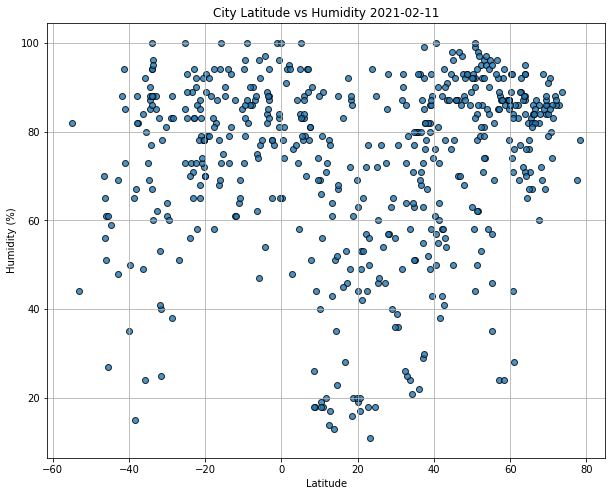

In [34]:
# Create a scatter plot for latitude vs humidity.
x_values = weather_df['Lat']
y_values = weather_df['Humidity']
fig1, ax1 = plt.subplots(figsize=(10, 8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity {date_time}')
plt.grid()
plt.savefig("../output_data/latitude_vs_humidity.png", bbox_inches="tight")
plt.show()

## The above scatter plot displayed the relationship between Humidity (%) vs. Latitude.From the result we can infer that humidity is fairly distributed troughout the plot, so we can say that high humidity occer for both cities found farther or near to the equator.

## Latitude vs. Cloudiness Plot

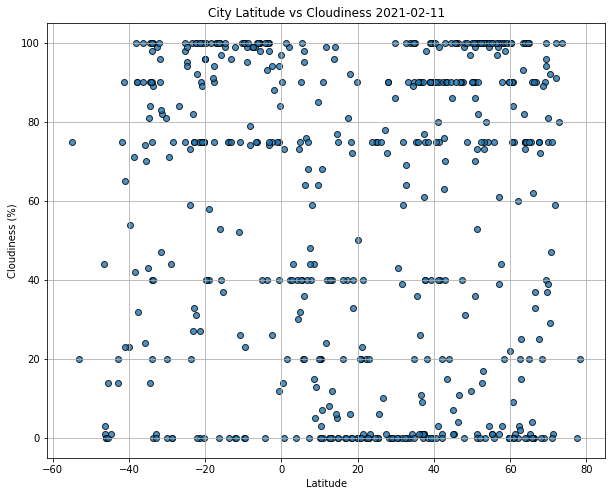

In [36]:
# Create a scatter plot for latitude vs cloudiness.
x_values = weather_df['Lat']
y_values = weather_df['Cloudiness']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness {date_time}')
plt.grid()
plt.savefig("../output_data/latitude_vs_cloudiness.png", bbox_inches="tight")
plt.show()

## The above scatter plot showed the relationship between the cities cloudness, and latitude. From this result we can tell that the data is evenly distributed, and there is no difference in Cloudiness when the cities farther or nearer to the equater(Latitude 0).

## Latitude vs. Wind Speed Plot

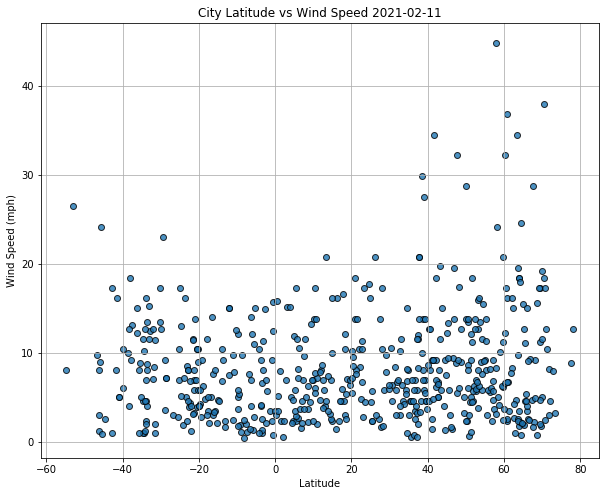

In [37]:
# Create a scatter plot for latitude vs wind speed.
x_values = weather_df['Lat']
y_values = weather_df['Wind Speed']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed {date_time}')
plt.grid()
plt.savefig("../output_data/latitude_vs_wind_speed.png", bbox_inches="tight")
plt.show()

## The above scatter plot showed the relationship between wind speed (mph), and latitude. The plot displayed the lower wind speed when the cities closer to the equater (latitude 0) and somehow the wind speed increase for the cities farther from the equater.

## Linear Regression

In [38]:
#Linear Regression
def createLinearRegressionPlot(x_values, y_values, x_label, y_label, hemisphere, line_placement, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    fig1, ax1 = plt.subplots(figsize=(10,8))
    plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
    plt.xlabel(x_label,fontsize = 14)
    plt.ylabel(y_label,fontsize = 14)
    if ylim is not None:
        plt.ylim(0, ylim)
    today = datetime.date(datetime.now())
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label} {today}",fontsize = 15)
    plt.annotate(line_eq,xy=(10, 50),fontsize=22,xycoords='data',xytext=(0.4, 0.4), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',color="red")
    plt.annotate(line_eq,xy=(-50, 40),fontsize=22,xycoords='data',xytext=(0.4, 0.3), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',color="red")
    plt.annotate(line_eq,xy=(10, 25),fontsize=22,xycoords='data',xytext=(0.4, 0.4), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',color="red")
    # Print r square value
    print(f"The r-squared is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    return plt.plot(x_values,regress_values,"r-")

In [39]:
# Create Northern and Southern Hemisphere DataFrames

northern_hemisphere_weather_df = weather_df.loc[weather_df["Lat"] >= 0]
southern_hemisphere_weather_df = weather_df.loc[weather_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7754712540902478
The correlation between both factors is -0.88


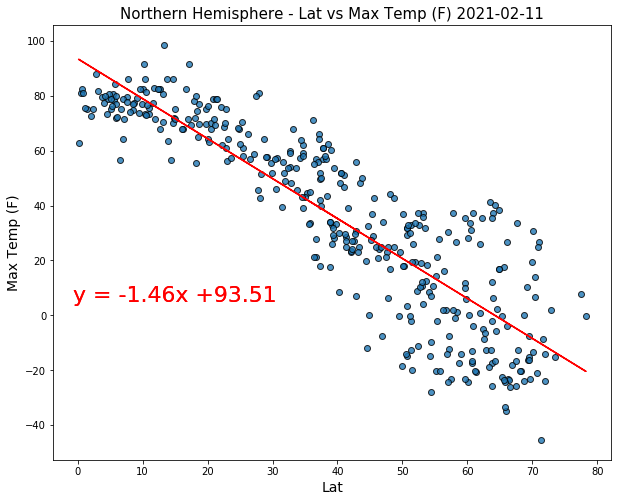

In [40]:
# Create a scatter plot for latitude vs max temp (northern hemisphere)
x_values = northern_hemisphere_weather_df['Lat']
y_values = northern_hemisphere_weather_df['Max Temp']
createLinearRegressionPlot(x_values, y_values, "Lat", "Max Temp (F)", "Northern",(0, 0))
plt.savefig("../output_data/Northern_Hemisphere_Max_lat_lin.png", bbox_inches="tight")
plt.show()

## The above plot is a linear regression model between Maximum tempreture and latitude for Northern Hemisphere cities. The result from the data showed that there is a strong, negative correlation between Maximum tempreture and latitude. These means when we go farther away from the equater(latitude 0) the maximum Temperature (F) will decrease.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.08110726662915732
The correlation between both factors is 0.28


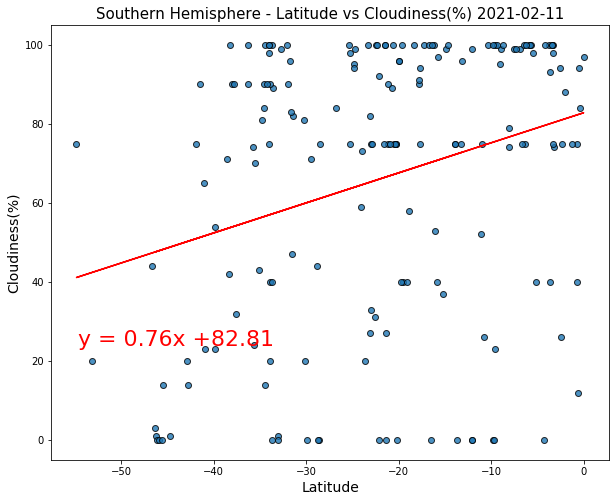

In [42]:
# Create a scatter plot for latitude vs cloudiness (southern hemisphere)
x_values = southern_hemisphere_weather_df['Lat']
y_values = southern_hemisphere_weather_df['Cloudiness']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Cloudiness(%)", "Southern",(-45, 60))

plt.savefig("../output_data/southern_Hemisphere_Max_lat_lin.png", bbox_inches="tight")
plt.show()

## The above plot is a linear regression model between Maximum tempreture and latitude for Southern Hemisphere cities. The result from the data showed that there is a very week almost none negative correlation between Maximum Tempreture and latitude in the Southern Hemisphere cities.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.11839350269078945
The correlation between both factors is 0.34


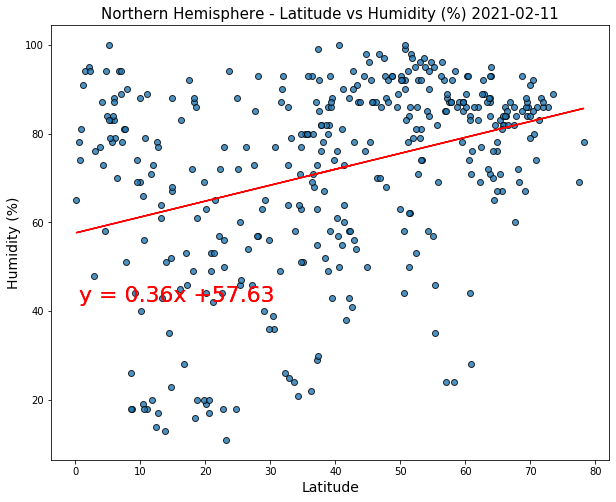

In [43]:
# Create a scatter plot for latitude vs humditiy (northern hemisphere)
x_values = northern_hemisphere_weather_df['Lat']
y_values = northern_hemisphere_weather_df['Humidity']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Humidity (%)", "Northern",(40, 20))
plt.savefig("../output_data/Northern_Hemisphere_Humidity_Latitude_Linear.png", bbox_inches="tight")
plt.show()

## The above plot is a linear regression model between Humidity (%) and Latitude for Northern Hemisphere cities. The result from the data showed that there is a very week negative correlation between Humidity (%) and Latitude in the Northern Hemisphere cities.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.11839350269078945
The correlation between both factors is 0.34


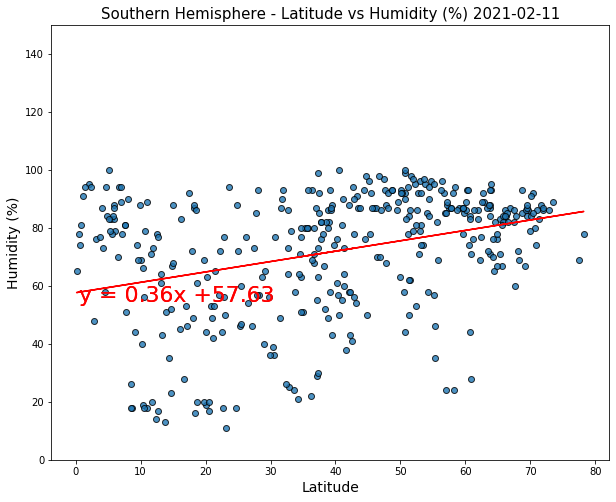

In [44]:
# Create a scatter plot for latitude vs humditiy (southern hemisphere)
x_values1 = southern_hemisphere_weather_df['Lat']
y_values1 = southern_hemisphere_weather_df['Humidity']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Humidity (%)", "Southern",(40, 20), 150)
plt.savefig("../output_data/southern_humudity_Hemisphere_Max_lat_lin.png", bbox_inches="tight")
plt.show()

## The above plot is a linear regression model between Humidity (%) and Latitude for Southern Hemisphere cities. The result from the data showed that there is a very week, almost none negative correlation between Humidity (%) and Latitude in the Southern Hemisphere cities.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.04077596323193225
The correlation between both factors is 0.2


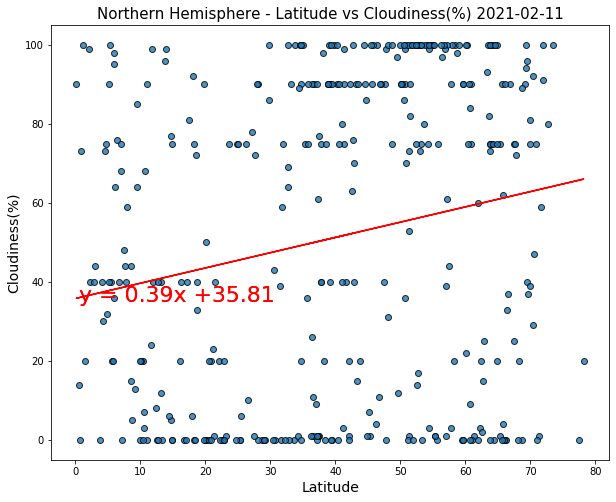

In [45]:
# Create a scatter plot for latitude vs cloudiness (northern hemisphere)
x_values = northern_hemisphere_weather_df['Lat']
y_values = northern_hemisphere_weather_df['Cloudiness']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Cloudiness(%)", "Northern",(30, 50))

plt.savefig("../output_data/Northern Hemisphere_Cloudiness_Latitude_Linear.png", bbox_inches="tight")
plt.show()

## The above plot is a linear regression model between Cloudiness (%) and Latitude for Northern_Hemisphere cities. The result from the data showed that there is a very week, almost none negative correlation between Cloudiness (%) and Latitude in the Southern Hemisphere cities.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.08110726662915732
The correlation between both factors is 0.28


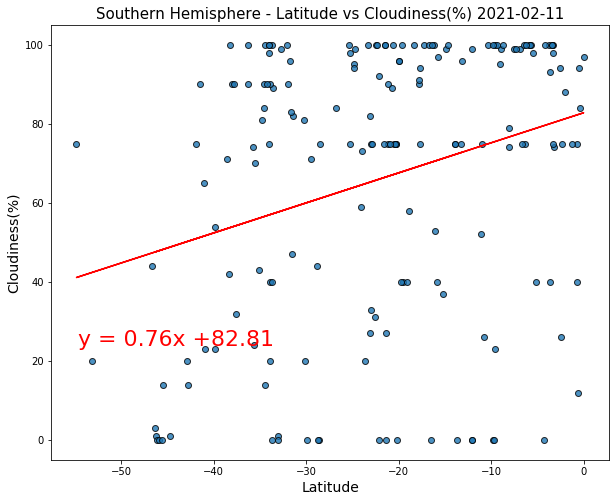

In [46]:
# Create a scatter plot for latitude vs cloudiness (southern hemisphere)
x_values = southern_hemisphere_weather_df['Lat']
y_values = southern_hemisphere_weather_df['Cloudiness']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Cloudiness(%)", "Southern",(-45, 60))
plt.savefig("../output_data/Southern_Hemisphere_Cloudiness_Latitude_Linear.png", bbox_inches="tight")
plt.show()

## The above plot is a linear regression model between Cloudiness (%) and for Southern Hemisphere cities. The result from the data showed that there is a very week, almost none negative correlation between Cloudiness (%) and Latitude in the Southern Hemisphere cities.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.023834902963476
The correlation between both factors is 0.15


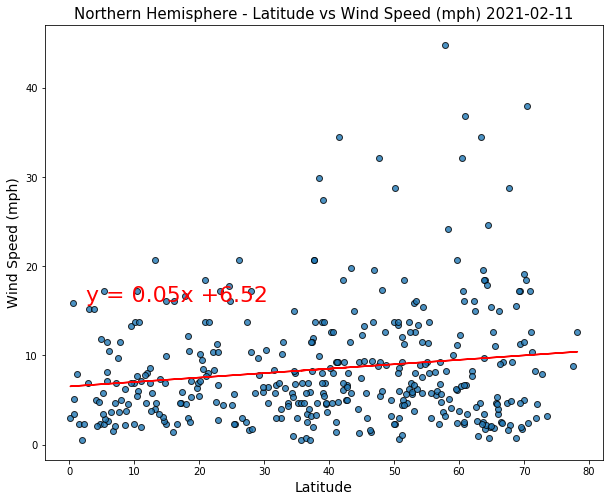

In [47]:
# Create a scatter plot for latitude vs wind speed(northern hemisphere)
x_values = northern_hemisphere_weather_df['Lat']
y_values = northern_hemisphere_weather_df['Wind Speed']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Wind Speed (mph)", "Northern",(20, 25))
plt.savefig("../output_data/Northern_Hemisphere_Wind_Speed_Latitude_Lin.png", bbox_inches="tight")
plt.show()

## The above plot is a linear regression model between Wind Speed (mph), and latitude for Northern_Hemisphere cities. The result from the data showed that there is a very week, posetive correlation between Wind Speed (mph (%) and Latitude in the Northern Hemisphere cities.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.050507839508924436
The correlation between both factors is -0.22


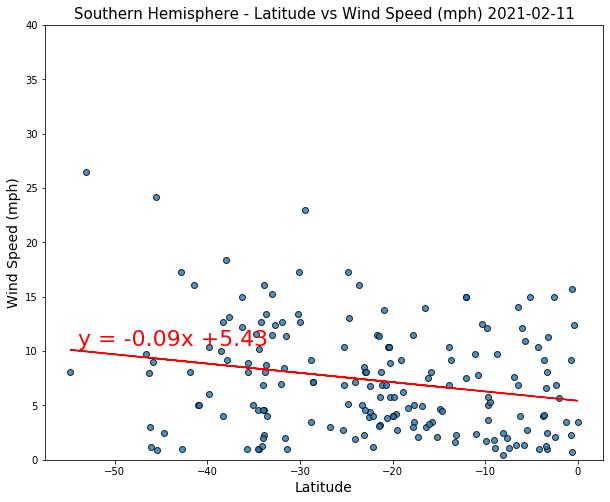

In [48]:
# Create a scatter plot for latitude vs wind speed (southern hemisphere)
x_values = southern_hemisphere_weather_df['Lat']
y_values = southern_hemisphere_weather_df['Wind Speed']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Wind Speed (mph)", "Southern",(-40, 25), ylim=40)
plt.savefig("../output_data/Southern_Hemisphere_Wind_Speed_Latitude_Linear_Regression.png", bbox_inches="tight")
plt.show()

## The above plot is a linear regression model between Wind Speed (mph), and latitude for Southern Hemisphere. The result from the data showed that there is a very week, negative correlation between Wind Speed (mph (%) and Latitude in the Northern Hemisphere cities